### DESCRIPTION

I will be performing clustering technique on customer dataset to visualize the relationship betweeen annual income and spending score. 
Clustering is a technique used in data science to group similar data points together. It can be used to discover patterns and insights within large data sets, and to identify relationship between different data points.
Clustering is often used in marketing to group customers based on their behavior or preference or in biology to group organisms on their characteristics'

### IMPORT THE RELEVANT LIBRARIES

In [1]:
#for data wrangling 
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set
import warnings

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

### Load the directory and data

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\HP'

In [4]:
os.chdir('C:\\Users\\HP\Downloads')

In [5]:
raw_data = pd.read_csv('Mall_Customers.csv')

In [6]:
raw_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


from the datasets we can see there is need for preprocssing before we visualize the datasets.

In [7]:
#before we proceed it is important we have a copy of our data
data = raw_data.copy()

In [8]:
#renaming the columns
data = data.rename(columns = {'Genre':'Sex', 'Spending Score (1-100)':'Spending Score'})

In [9]:
data

,CustomerID,Sex,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Sex                 200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
#checking for missing values
data.isnull().sum()

CustomerID            0
Sex                   0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

There are no missing vakues. so we can proceed to visualization of data

Text(0.5, 1.0, 'Spending Score  by Gender')

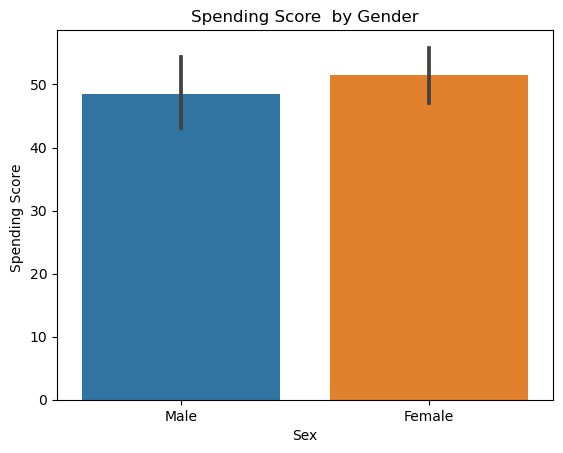

In [12]:
sns.barplot(x = 'Sex', y ='Spending Score', data = data)
plt.ylabel('Spending Score ')
plt.title('Spending Score  by Gender')

# Comment: Female are likely to spend more annually

In [13]:
data

,CustomerID,Sex,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### SCATTER PLOT

Text(0.5, 1.0, 'Annual Income vs Spending Score')

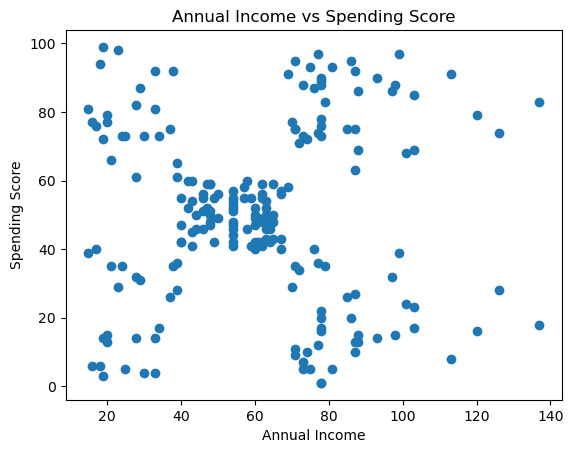

In [14]:
#let create a preliminary plot and see what we have 
plt.scatter(data['Annual Income (k$)'], data['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')

we will be working with the Annual Income and Spending score using KMEANS Clustering Technique

In [15]:
#let us retrieve the two columns and give it a variable name 
x = data.iloc[:,[3,4]].values

In [16]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Clustering

### Take advantage of the elbow method to help us get the best number of clusters 

In [17]:
# Create an empty list
wcss = []

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,11):
    # Clsuter solution with i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # Fit the STANDARDIZED data
    kmeans.fit(x)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

Text(0, 0.5, 'WCSS')

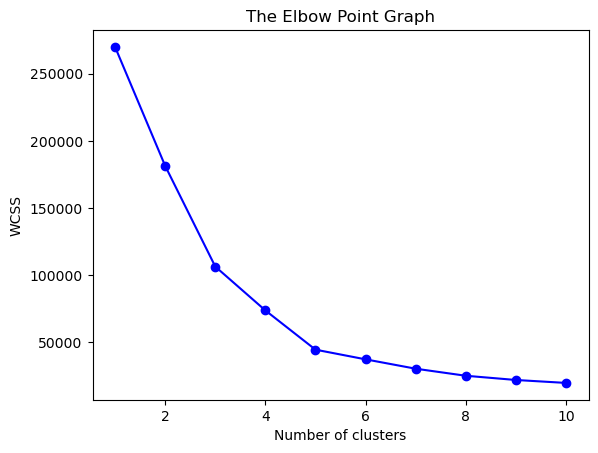

In [18]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,11),wcss, 'bo-')
# Name your axes
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the above table we can use the number of cluster to be 5

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# Fit the data

cluster_pred = kmeans.fit_predict(x)

In [20]:
print(cluster_pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


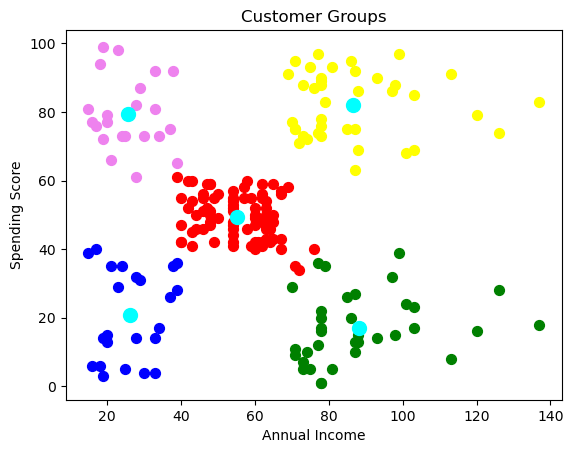

In [21]:
plt.scatter(x[cluster_pred==0,0], x[cluster_pred==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[cluster_pred==1,0], x[cluster_pred==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[cluster_pred==2,0], x[cluster_pred==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[cluster_pred==3,0], x[cluster_pred==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[cluster_pred==4,0], x[cluster_pred==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

From the clusters above and with the help of KMeans the clusters was arranged in four different segment by locating their centroid.

The spending score is a metric that measures how much a customer spends on average and annual is the income of the customer

#### Now let us analyze the Graph

1. Customers in the top right cluster have high annual income and high spending scores,which means they are HIGH-VALUE customers

2. Customers in the bottom right cluster have high annual incomes but low spending scores, which means they are not spending as much as they could be.

3. Customers in the to left cluster have low annual incomes but high spending scores, which means they are spending alot relative to their income.

4. Customers in the bottom left cluster have low annual income and low spending score, which means they are LOW-VALUE customers